<a href="https://colab.research.google.com/github/Fadila13/Machine-Learning/blob/main/Energy_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load the dataset
url = '/content/Energy_consumption.csv'
consumption = pd.read_csv(url)
consumption

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
995,2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,Off,Off,21.194696,Saturday,No,82.306692
996,2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,Off,On,25.748176,Tuesday,Yes,66.577320
997,2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,Off,On,0.297079,Friday,Yes,72.753471
998,2022-02-11 14:00:00,25.138365,31.306459,1309.079719,3,On,Off,20.425163,Thursday,Yes,76.950389


In [5]:
consumption.shape

(1000, 11)

In [6]:
consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [7]:
consumption.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [8]:
consumption.duplicated().sum()

0

In [9]:
consumption.isna().sum()

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

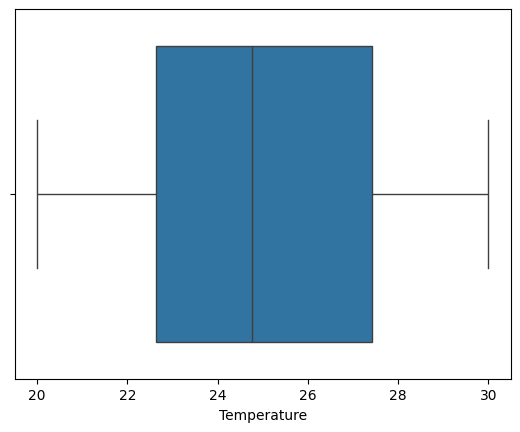

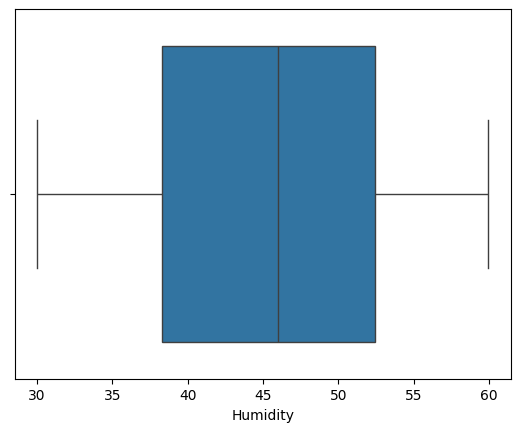

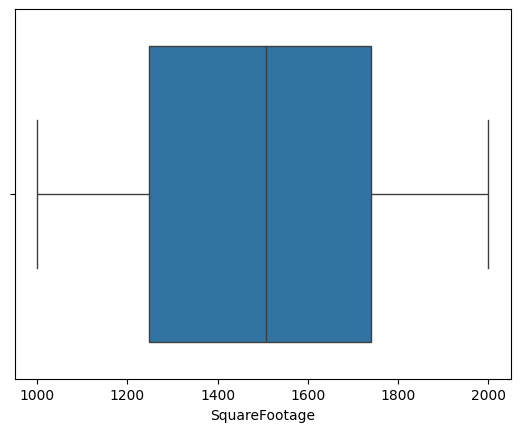

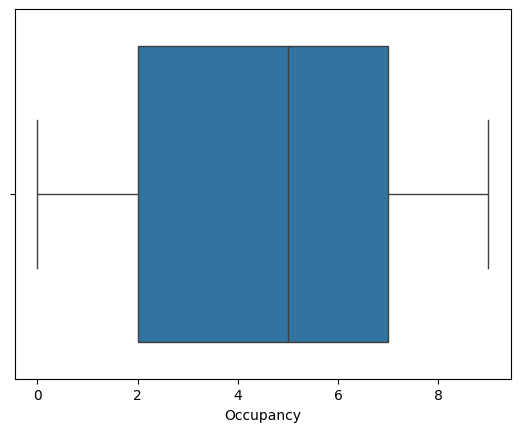

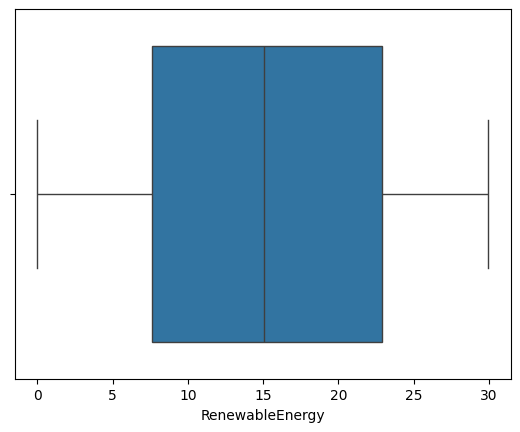

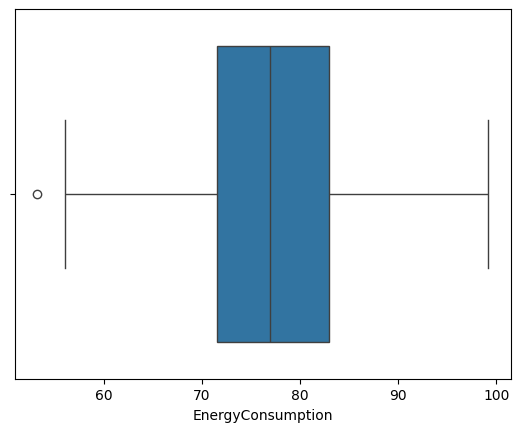

In [10]:
#Seltman dalam “Experimental Design and Analysis” [24] menyatakan bahwa outliers yang diidentifikasi oleh boxplot (disebut juga “boxplot outliers”) didefinisikan sebagai data yang nilainya 1.5 QR di atas Q3 atau 1.5 QR di bawah Q1.
#Hal pertama yang perlu Anda lakukan adalah membuat batas bawah dan batas atas. Untuk membuat batas bawah, kurangi Q1 dengan 1,5 * IQR. Kemudian, untuk membuat batas atas, tambahkan 1.5 * IQR dengan Q3.

consumption1=consumption.select_dtypes(exclude=['object'])
for column in consumption1:
        plt.figure()
        sns.boxplot(data=consumption1, x=column)

In [11]:
Q1 = consumption.quantile(0.25)
Q3 = consumption.quantile(0.75)
IQR=Q3-Q1

housing = consumption[~((consumption<(Q1-1.5*IQR))|(consumption>(Q3+1.5*IQR))).any(axis=1)]

<ipython-input-11-ecc7fd60bf15>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = consumption.quantile(0.25)
<ipython-input-11-ecc7fd60bf15>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = consumption.quantile(0.75)
<ipython-input-11-ecc7fd60bf15>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  housing = consumption[~((consumption<(Q1-1.5*IQR))|(consumption>(Q3+1.5*IQR))).any(axis=1)]


In [12]:
consumption.shape

(1000, 11)

In [13]:
categorical_features = ['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']
numerical_features = ['Timestamp', 'Temperatur',	'Humadity',	'SquareFootage',	'Occupancy',	'RenewableEnergy',	'EnergyConsumption']


     Jumlah sampel  Persentase
Off            508        50.8
On             492        49.2


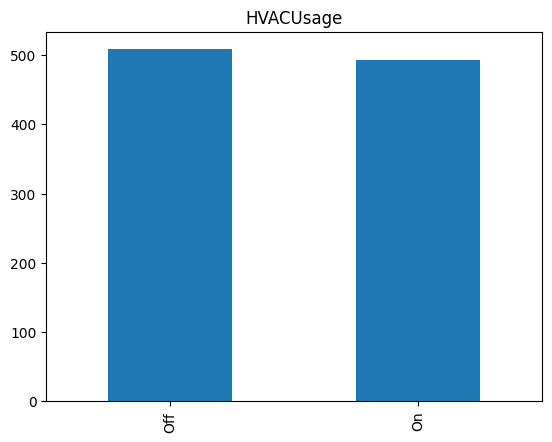

In [22]:
feature = categorical_features[(0)]
count = consumption[feature].value_counts()
percent = 100*consumption[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

     Jumlah sampel  Persentase
Off            509        50.9
On             491        49.1


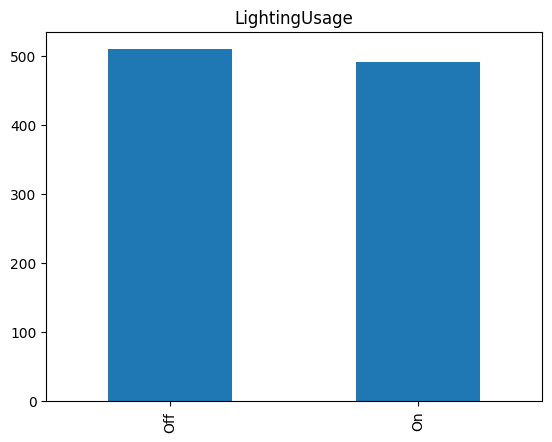

In [23]:
feature = categorical_features[(1)]
count = consumption[feature].value_counts()
percent = 100*consumption[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

           Jumlah sampel  Persentase
Friday               164        16.4
Sunday               154        15.4
Thursday             146        14.6
Tuesday              146        14.6
Saturday             143        14.3
Wednesday            124        12.4
Monday               123        12.3


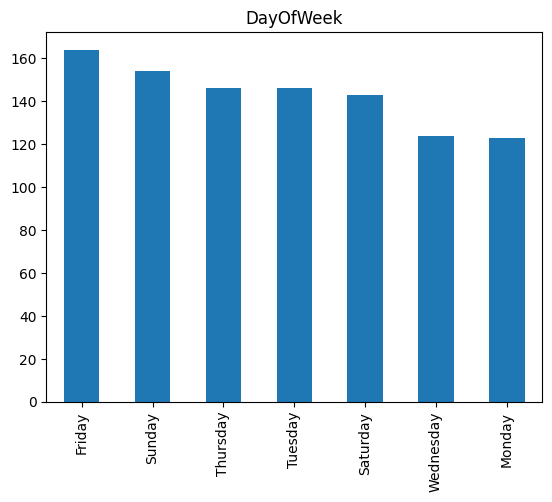

In [24]:
feature = categorical_features[(2)]
count = consumption[feature].value_counts()
percent = 100*consumption[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

     Jumlah sampel  Persentase
No             533        53.3
Yes            467        46.7


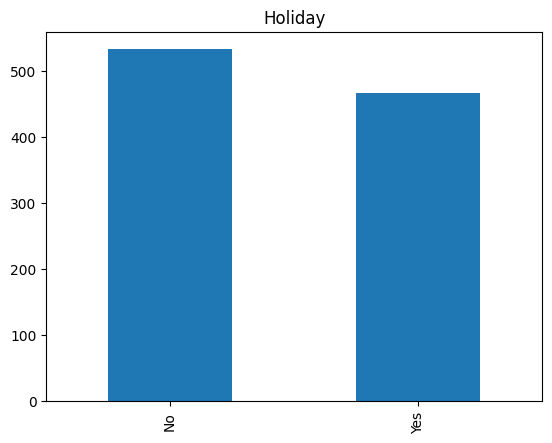

In [25]:
feature = categorical_features[(3)]
count = consumption[feature].value_counts()
percent = 100*consumption[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

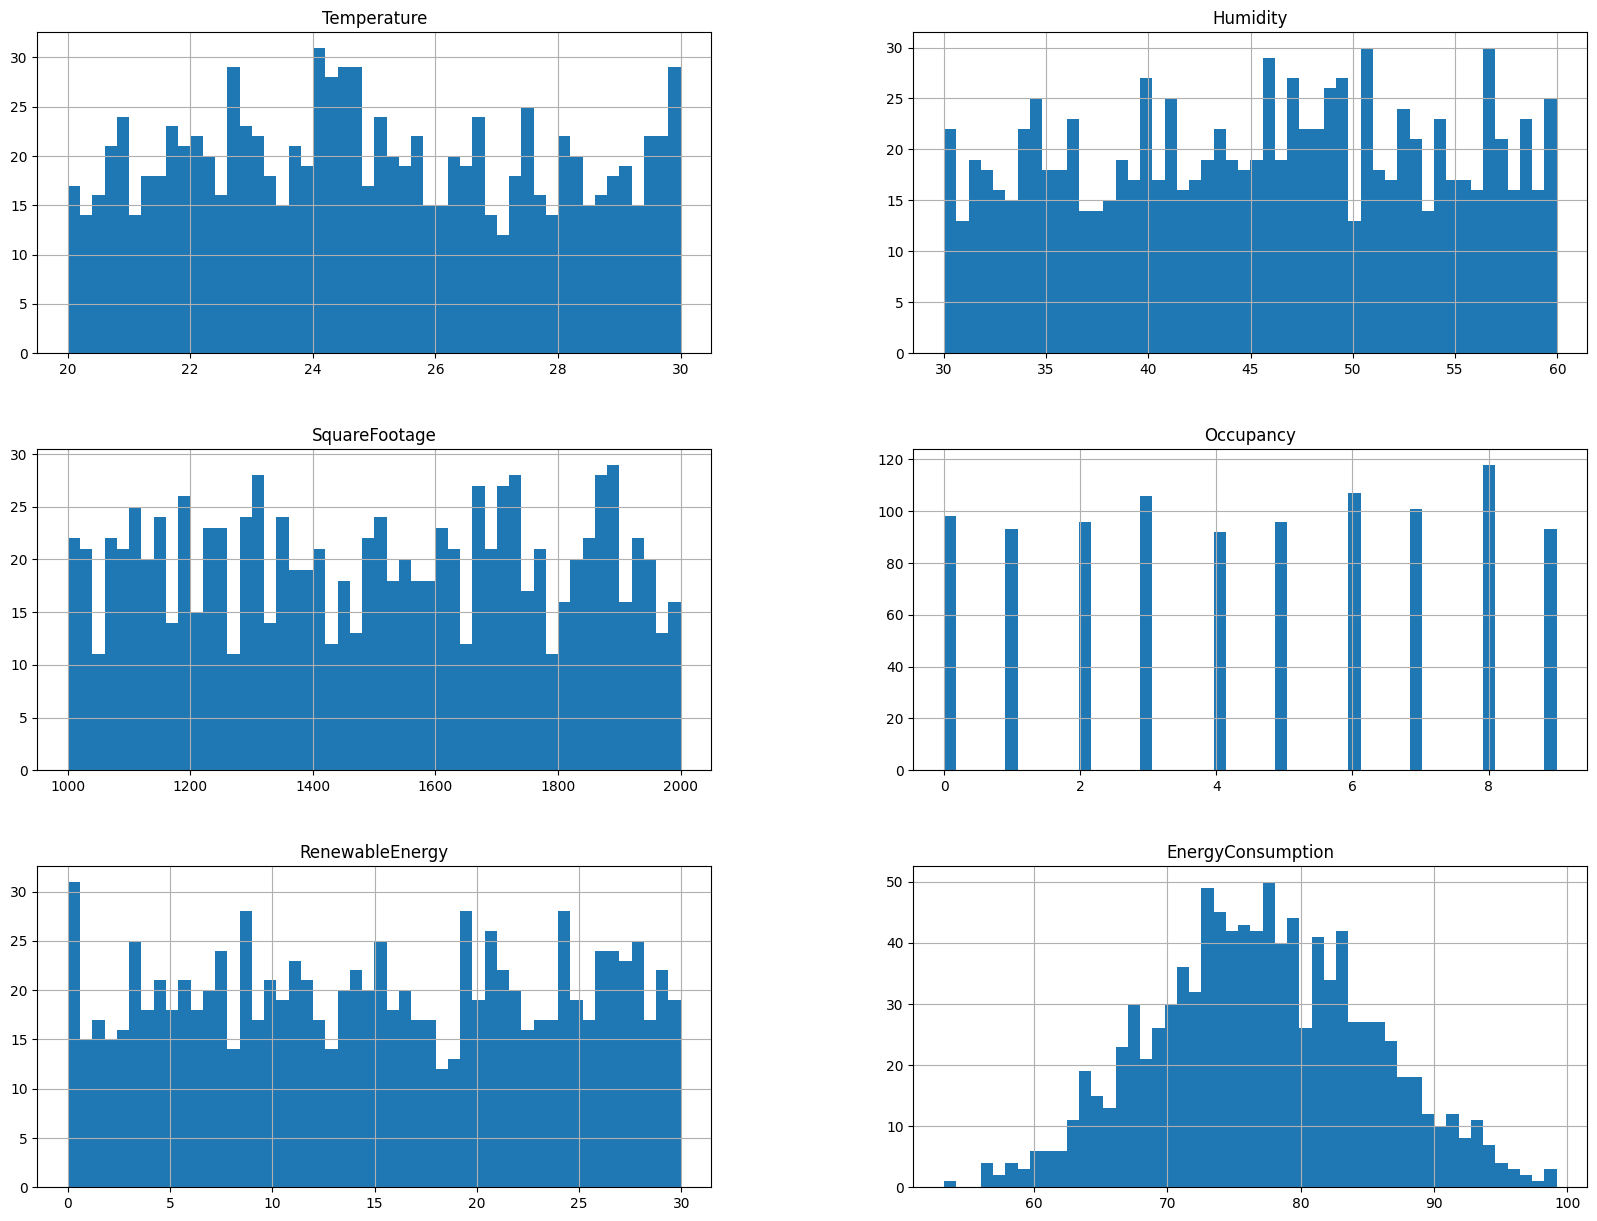

In [26]:
consumption.hist(bins=50, figsize=(20,15))
plt.show()

<ipython-input-27-53b083b8bcc7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='HVACUsage', kind="bar", dodge=False, height = 4, aspect = 3,  data=consumption, palette="Set3")
<ipython-input-27-53b083b8bcc7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='HVACUsage', kind="bar", dodge=False, height = 4, aspect = 3,  data=consumption, palette="Set3")
<ipython-input-27-53b083b8bcc7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='HVACUsage', kind="bar", dodge=False, height = 4, aspect = 3,  data=consumption, pa

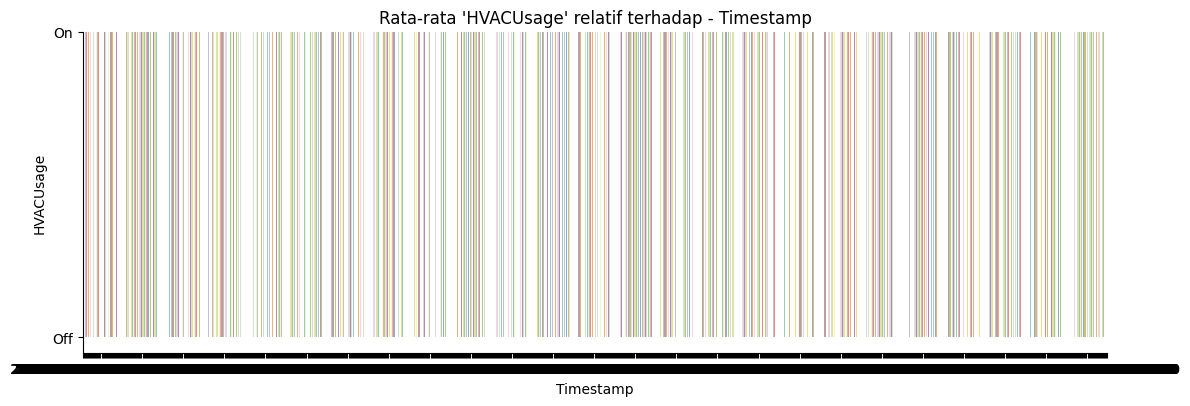

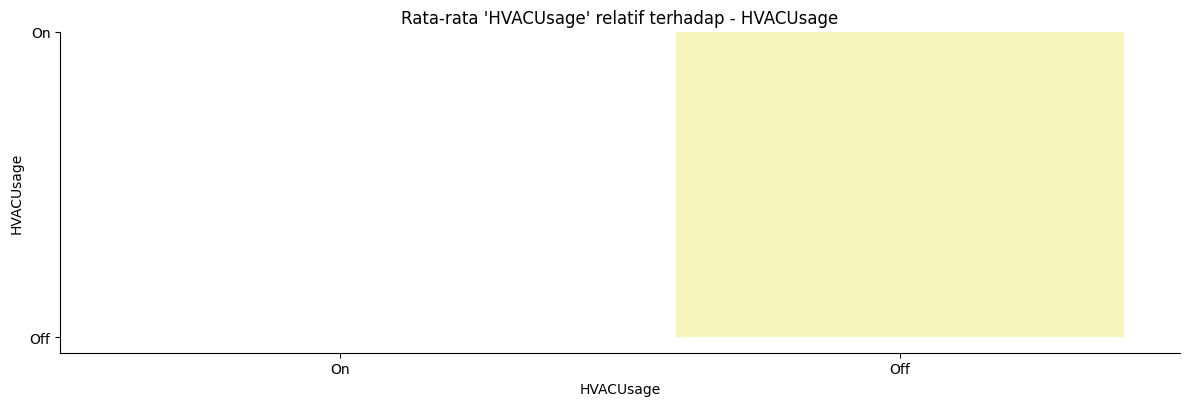

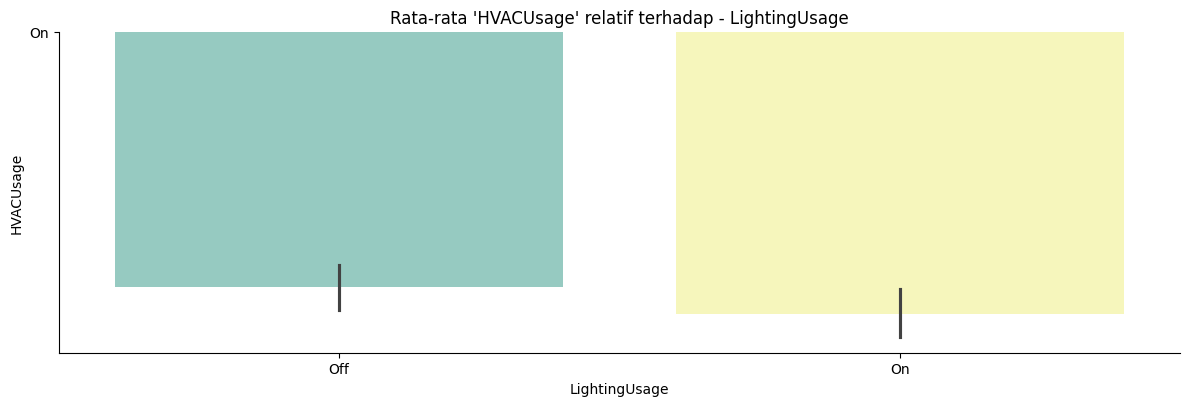

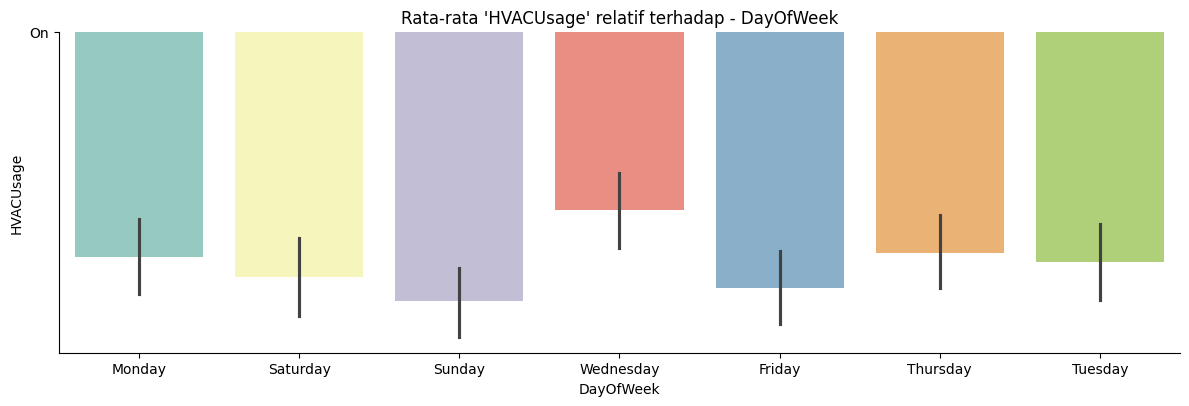

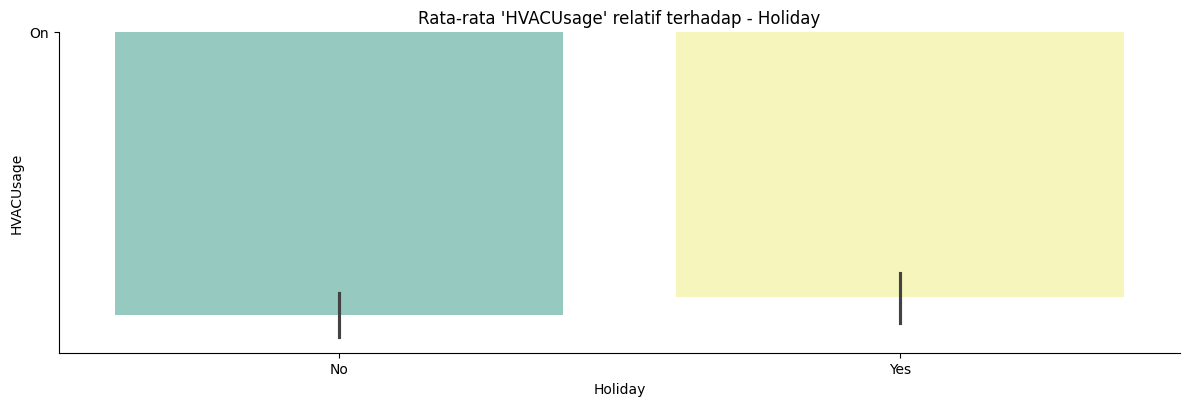

In [27]:
cat_features = consumption.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y='HVACUsage', kind="bar", dodge=False, height = 4, aspect = 3,  data=consumption, palette="Set3")
  plt.title("Rata-rata 'HVACUsage' relatif terhadap - {}".format(col))

<ipython-input-31-cf6f53312439>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='LightingUsage', kind="bar", dodge=False, height = 4, aspect = 3,  data=consumption, palette="Set3")
<ipython-input-31-cf6f53312439>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='LightingUsage', kind="bar", dodge=False, height = 4, aspect = 3,  data=consumption, palette="Set3")
<ipython-input-31-cf6f53312439>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='LightingUsage', kind="bar", dodge=False, height = 4, aspect = 3,  data=con

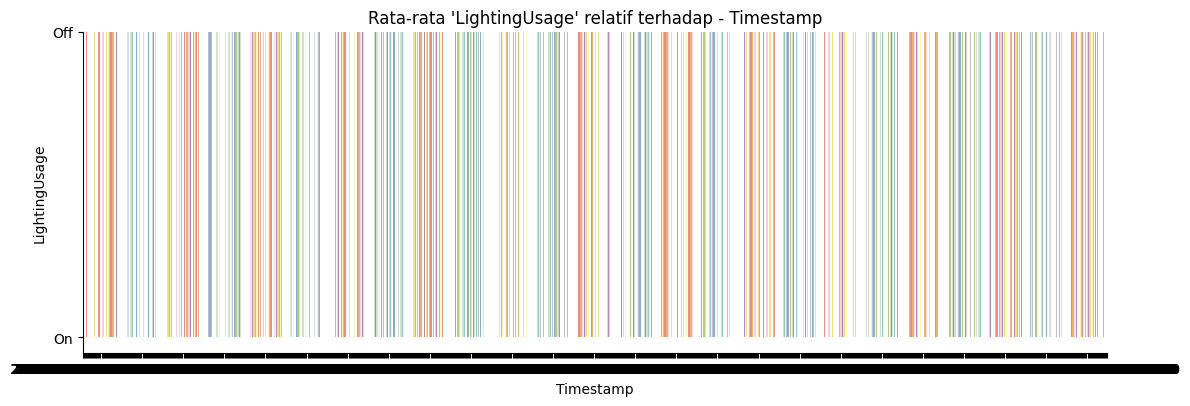

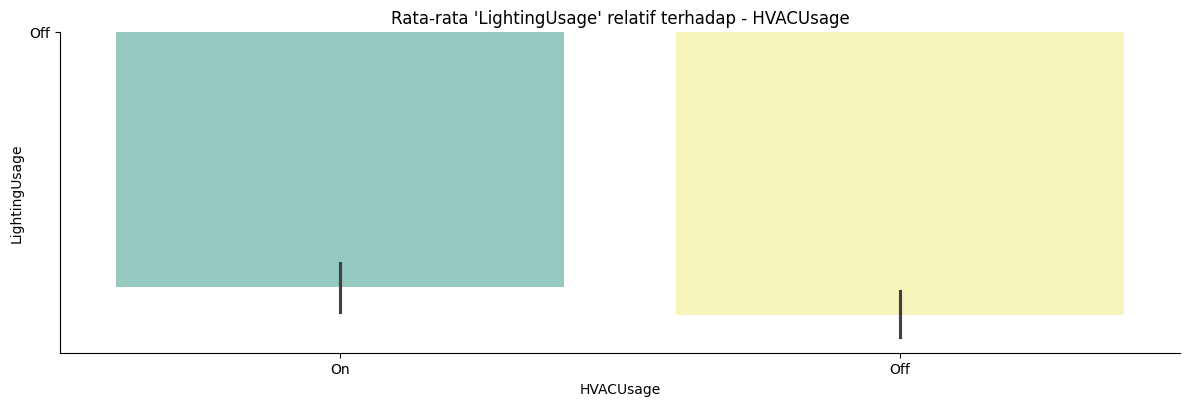

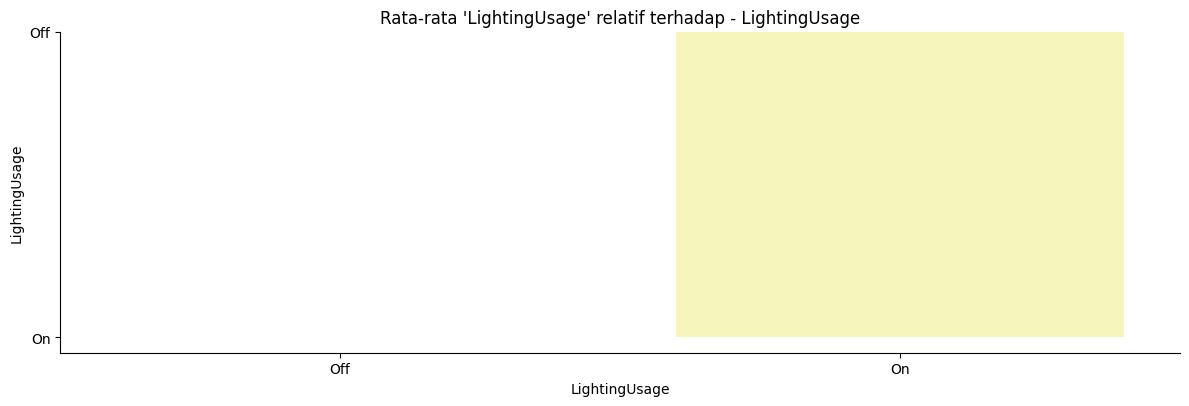

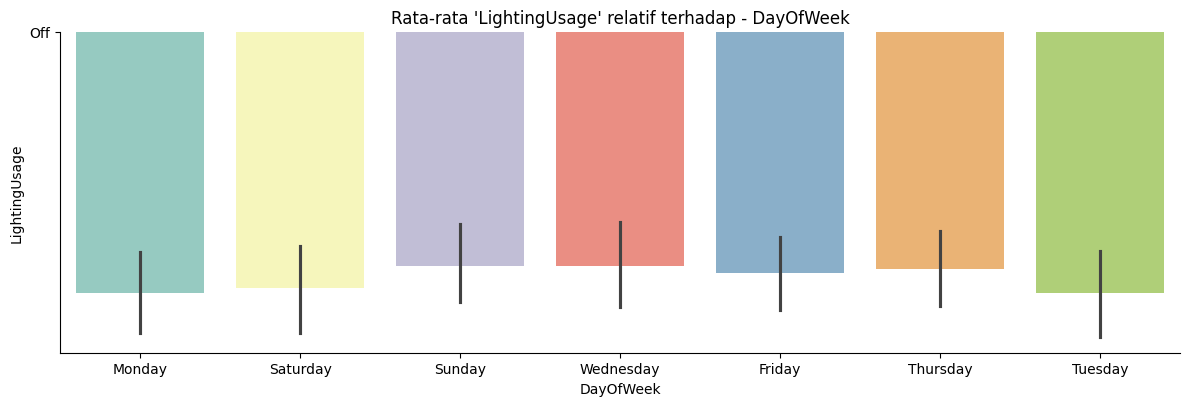

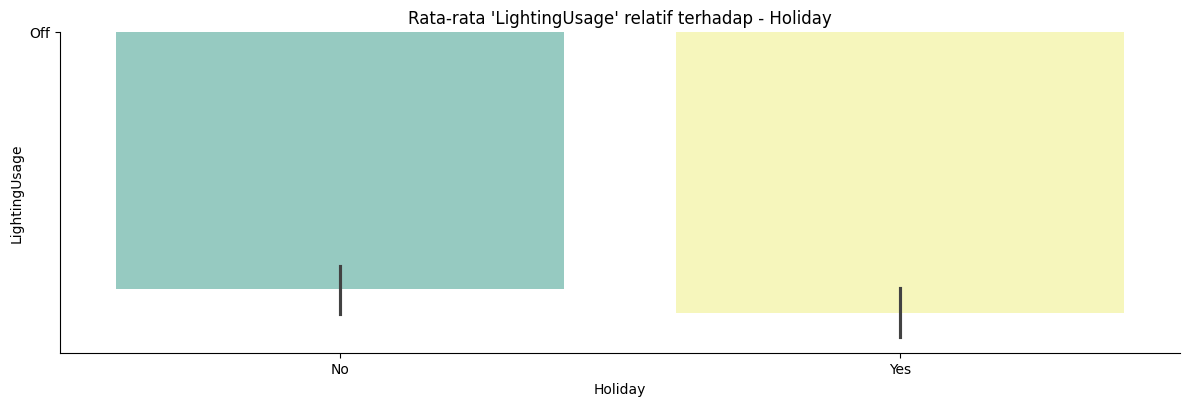

In [31]:
cat_features = consumption.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y='LightingUsage', kind="bar", dodge=False, height = 4, aspect = 3,  data=consumption, palette="Set3")
  plt.title("Rata-rata 'LightingUsage' relatif terhadap - {}".format(col))